# The K-means Method

## Overview

In this section, we will review one of the most used clustering methods i.e <a href="https://en.wikipedia.org/wiki/K-means_clustering">k-means clustering</a>. This  clustering methodology originating from the field of signal processing.
It aims to partition $N$ observations into $k$ clusters such that  each observation belongs to the cluster with the nearest mean serving as a prototype of the cluster [1]. The prototype of each cluster is also called the cluster centroid. This approach results in a partitioning of the data space into Voronoi cells [1]. The algorithm we will discuss, minimizes within-cluster variances (squared Euclidean distances), but not regular Euclidean distances, which would be the more difficult Weber problem: the mean optimizes squared errors, whereas only the geometric median minimizes Euclidean distances [1]. 

The algorithm determines a single cluster for each data point and tends to find tends clusters of comparable spatial extent.
This is in contrast to the GMM that allows clusters to have different shapes. K-means can be considered the hard version of
the Gaussina mixture model.

In addition, the algorithm has differebt flavours such as k-medians and k-medoids.

##  The K-means method

Let's denote the centroid of cluster $j$ as $\mu_j$. The centroid is just the mean of all the points within the
cluster $C_j$:

\begin{equation}
\mu_j = \frac{1}{n_j}\sum_{i\in C_j}x_i
\end{equation}

where $i \in C_j$ denotes that the $i-th$ data point belongs in cluster $C_j$
The intra-cluster average distance between samples and centroids is defined as

\begin{equation}
S = \sum_{j=1}^k \sum_{i\in C_j}||x_i - \mu_j||^2
\end{equation}

$S$ is also called the inertia.High levels of inertia imply low cohesion; too many points belong to clusters whose centroids are far away. 

## Example 1

In this example we want to cluster points coming from four diifferent normal distributions.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [34]:
np.random.seed(4)

x1 = np.random.normal(1.0, 0.1, 50)
y1 = np.random.normal(1.0, 0.1, 50)

x2 = np.random.normal(3.0, 1.2, 50)
y2 = np.random.normal(3.0, 1.2, 50)

x3 = np.random.normal(2.5, 0.8, 50)
y3 = np.random.normal(2.5, 0.8, 50)

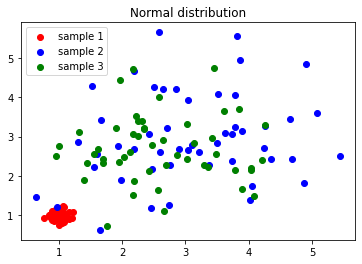

In [37]:
plt.scatter(x1, y1, color='r', label="sample 1")
plt.scatter(x2, y2, color='b', label="sample 2")
plt.scatter(x3, y3, color='g', label="sample 3")

plt.title("Normal distribution")
plt.legend(loc="upper left")
plt.show()

In [39]:
# mix the data
x = []
y = []
z = []

for i in range(50):
    x.append([x1[i], y1[i]])
    y.append([x2[i], y2[i]])
    z.append([x3[i], y3[i]])

x = np.vstack([x, y,z])

In [42]:
kmeans = KMeans(n_clusters=3, n_init=4, random_state=42)
kmeans.fit(x)

KMeans(n_clusters=3, n_init=4, random_state=42)

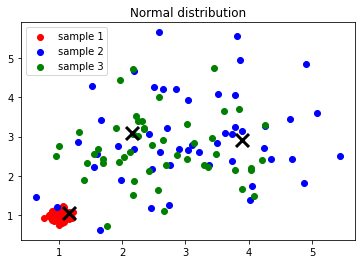

In [43]:
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="black",
    zorder=10,
)

plt.scatter(x1, y1, color='r', label="sample 1")
plt.scatter(x2, y2, color='b', label="sample 2")
plt.scatter(x3, y3, color='g', label="sample 3")
plt.title("Normal distribution")
plt.legend(loc="upper left")
plt.show()

## Summary

## References

1. <a href="https://en.wikipedia.org/wiki/K-means_clustering">k-means clustering</a>